## Identifying Spotify Packets

### Inspect Data

In [2]:
import pandas as pd

In [3]:
app_df = pd.read_csv('../data/spotify_app_control_sorted.csv', index_col=0)
web_df = pd.read_csv('../data/spotify_web_control_sorted.csv', index_col=0)
app_df.head()

,time,protocol,src_ip,dst_ip,src_port,dst_port,length,payload_size,query_name,spotify_or_not,interarrival_time,dst_interarrival_time
0,1.712707e+09,58.0,fe80::82ab:4dff:febf:19e1,fe80::813:7ec4:1375:15d9,NaN,NaN,32.0,NaN,NaN,0,NaN,NaN
1,1.712707e+09,58.0,fe80::813:7ec4:1375:15d9,fe80::82ab:4dff:febf:19e1,NaN,NaN,24.0,NaN,NaN,0,0.000159,NaN
2,1.712707e+09,17.0,2600:1700:1420:3b60:e46c:b485:479d:6b1a,2600:1700:1420:3b60::1,61799.0,53.0,51.0,43.0,gateway.fe2.apple-dns.net.,0,0.080788,NaN
3,1.712707e+09,17.0,2600:1700:1420:3b60:e46c:b485:479d:6b1a,2600:1700:1420:3b60::1,52311.0,53.0,51.0,43.0,gateway.fe2.apple-dns.net.,0,0.000199,0.000199
4,1.712707e+09,17.0,2600:1700:1420:3b60::1,2600:1700:1420:3b60:e46c:b485:479d:6b1a,53.0,52311.0,83.0,75.0,gateway.fe2.apple-dns.net.,0,0.004130,NaN


In [3]:
app_df.describe()

,time,protocol,src_port,dst_port,length,payload_size,spotify_or_not,interarrival_time,dst_interarrival_time
count,5.769000e+03,4516.000000,4399.000000,4399.000000,4516.000000,4399.000000,5769.000000,5768.000000,4465.000000
mean,1.712707e+09,12.943977,29012.033644,28428.874062,293.016608,276.116617,0.045588,0.069218,2.288770
std,1.352725e+02,9.057719,29719.665829,29816.888141,433.486023,438.027040,0.208609,0.206850,14.369664
min,1.712707e+09,2.000000,53.000000,53.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,1.712707e+09,6.000000,443.000000,443.000000,39.000000,0.000000,0.000000,0.000029,0.000028
50%,1.712707e+09,17.000000,5353.000000,5353.000000,62.500000,43.000000,0.000000,0.000342,0.003023
75%,1.712707e+09,17.000000,61732.000000,61733.000000,294.750000,295.500000,0.000000,0.006922,0.049944
max,1.712707e+09,58.000000,65527.000000,65527.000000,1500.000000,1460.000000,1.000000,1.980251,369.846677


In [4]:
web_df.describe()

,time,protocol,src_port,dst_port,length,payload_size,spotify_or_not,interarrival_time,dst_interarrival_time
count,3.858000e+04,37577.000000,37467.000000,37467.000000,37577.000000,37467.000000,38580.000000,3.857900e+04,3.752900e+04
mean,1.712706e+09,7.050696,7125.068434,54705.724104,1211.752003,1184.864734,0.001607,1.036495e-02,2.073272e-01
std,1.055447e+02,4.045418,18946.987869,19294.434749,501.779712,496.127461,0.040056,8.873278e-02,4.243090e+00
min,1.712706e+09,1.000000,53.000000,53.000000,12.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.712706e+09,6.000000,443.000000,61688.000000,1460.000000,1428.000000,0.000000,9.536743e-07,9.536743e-07
50%,1.712706e+09,6.000000,443.000000,61688.000000,1460.000000,1428.000000,0.000000,9.536743e-07,9.536743e-07
75%,1.712706e+09,6.000000,443.000000,61690.000000,1460.000000,1428.000000,0.000000,1.907349e-06,1.192093e-06
max,1.712707e+09,58.000000,65396.000000,65396.000000,1500.000000,1452.000000,1.000000,2.150631e+00,2.649304e+02


In [74]:
# web_df.to_csv('../data/spotify_web_control_sorted_labeled.csv')

Considering the relatively small size of data, I will not use Neural Networks. Instead, I will start with Decision Tree to set the baseline for the performance of the models.

### Decision Tree Classifier (DT)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from math import sqrt

These features will be used to predict the spotify_or_not packets: `protocol`, `length`, `payload_size`, `interarrival_time`, `dst_interarrival_time`.

In [6]:
# Encode categorical varibles
le = LabelEncoder()
app_df['protocol'] = le.fit_transform(app_df['protocol'])
web_df['protocol'] = le.fit_transform(web_df['protocol'])

# Define features and target
X = app_df[['protocol', 'length', 'payload_size', 'interarrival_time', 'dst_interarrival_time']]
y = app_df['spotify_or_not']
X_web = web_df[['protocol', 'length', 'payload_size', 'interarrival_time', 'dst_interarrival_time']]
y_web = web_df['spotify_or_not']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_web, X_test_web, y_train_web, y_test_web = train_test_split(X_web, y_web, test_size=0.3, random_state=42)

In [7]:
# Train decision tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

dt_classifier_web = DecisionTreeClassifier(random_state=42)
dt_classifier_web.fit(X_train_web, y_train_web)

DecisionTreeClassifier(random_state=42)

In [8]:
# Make predictions
predictions = dt_classifier.predict(X_test)
predictions_web = dt_classifier_web.predict(X_test_web)

# Evaluate the model
print("Decision Tree on App data")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

print("Decision Tree on Web data")
print("Accuracy:", accuracy_score(y_test_web, predictions_web))
print("RMSE:", sqrt(mean_squared_error(y_test_web, predictions_web)))
print("Classification Report:\n", classification_report(y_test_web, predictions_web))

Decision Tree on App data
Accuracy: 0.9664933564413634
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1631
           1       0.73      0.66      0.69       100

    accuracy                           0.97      1731
   macro avg       0.86      0.82      0.84      1731
weighted avg       0.97      0.97      0.97      1731

Decision Tree on Web data
Accuracy: 0.9985311905996198
RMSE: 0.03832504925476499
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11557
           1       0.50      0.47      0.48        17

    accuracy                           1.00     11574
   macro avg       0.75      0.73      0.74     11574
weighted avg       1.00      1.00      1.00     11574



#### Visualize the DT Classifier

In [51]:
import matplotlib.pyplot as plt

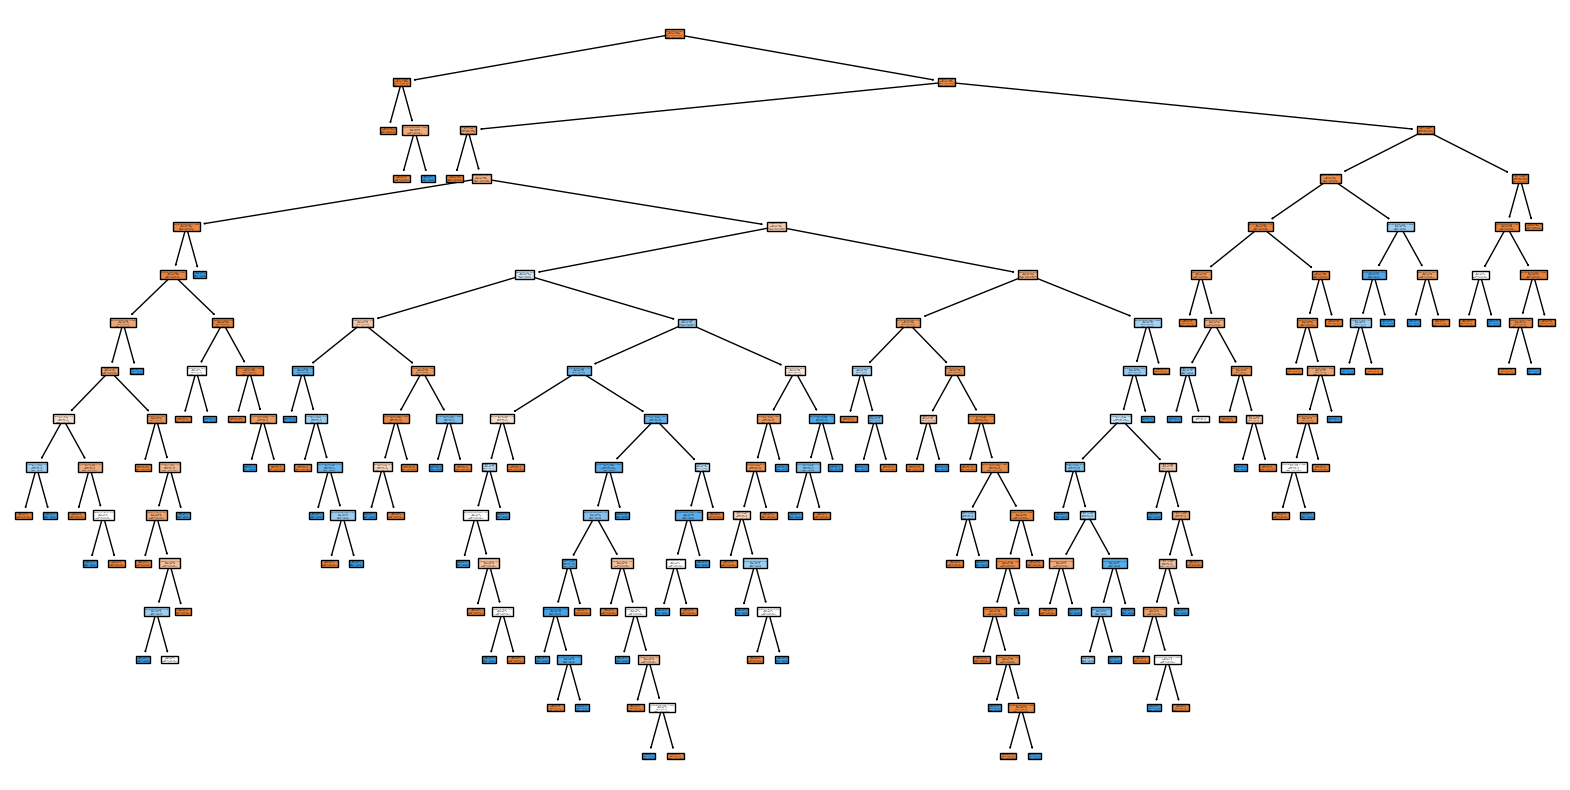

In [10]:
# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=['Not Spotify','Spotify'])
# plt.show()
plt.savefig('../visualization/decision_tree_app.pdf', format='pdf')

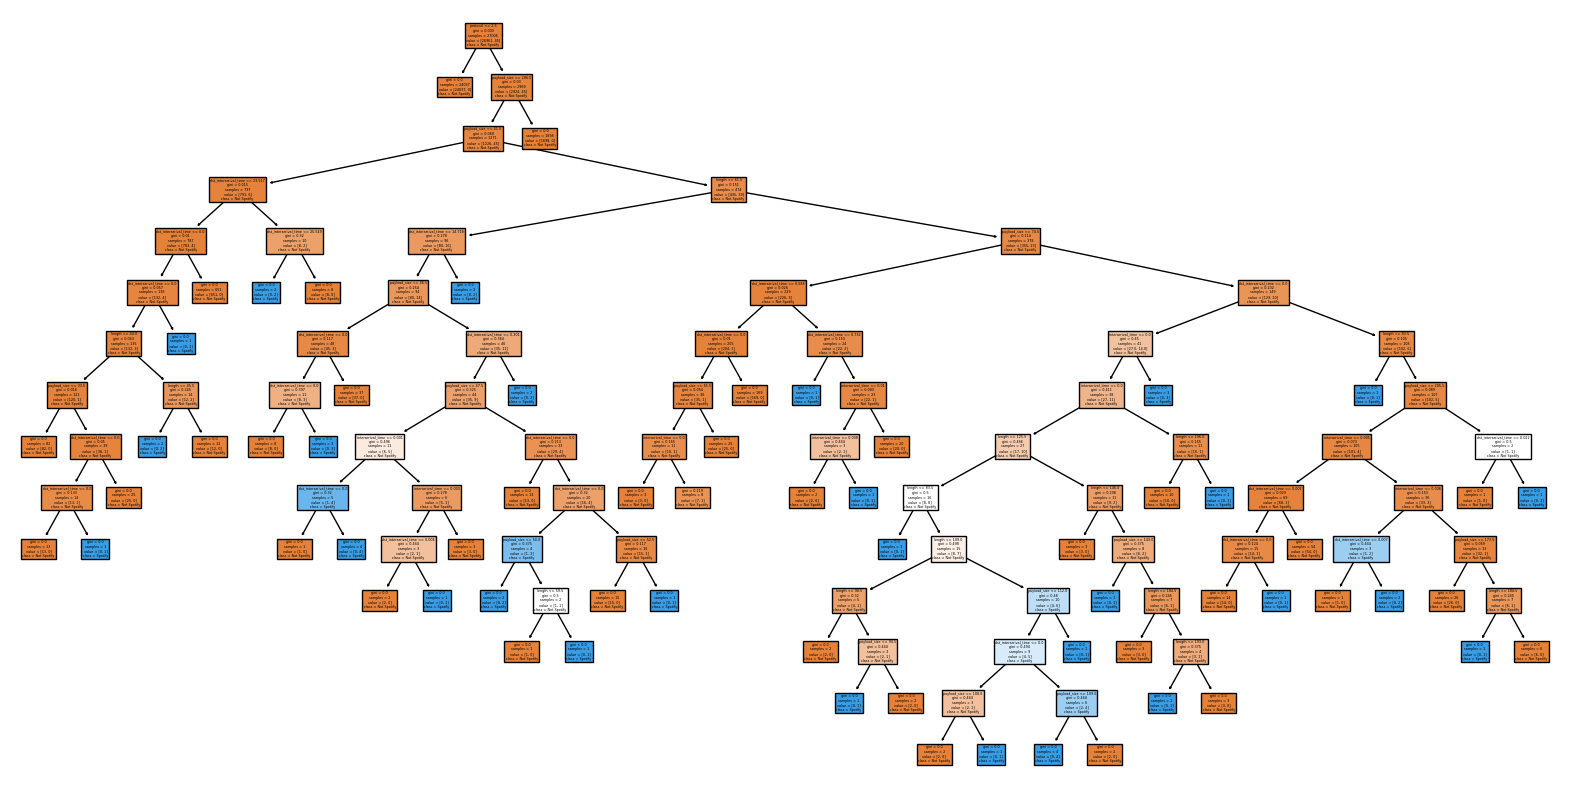

In [11]:
# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier_web, filled=True, feature_names=X_train.columns, class_names=['Not Spotify','Spotify'])
# plt.show()
plt.savefig('../visualization/decision_tree_web.pdf', format='pdf')

### Clustering

Using `spotify_or_not` as a label is not the most reliable way to determine the Spotify packet, because it's simply labeled as spotify packet if the header contains the word 'spotify'. Therefore, I will now try to cluster the packets to see if I can create a cluster for Spotify Packets.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [13]:
# Extracting the features for clustering
features = app_df[['protocol', 'length', 'payload_size', 'interarrival_time', 'dst_interarrival_time']]

###########
# Imputing with mean is not the ideal way because each packet is different (especially for protocol, length and payload_size)
##########
# Imputing with the mean
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

In [14]:
# Assuming two clusters for Spotify Playback packets and Nonplayback pacekts
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features_scaled)

# The cluster labels for each data point
clusters = kmeans.labels_
app_df['cluster'] = clusters

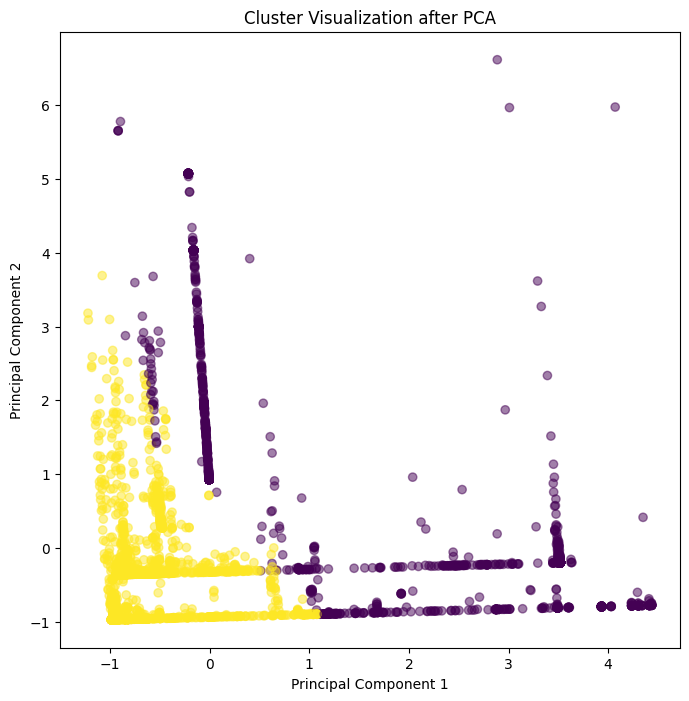

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)

# Plotting the clusters
plt.figure(figsize=(8, 8))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.title('Cluster Visualization after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Now with web data.

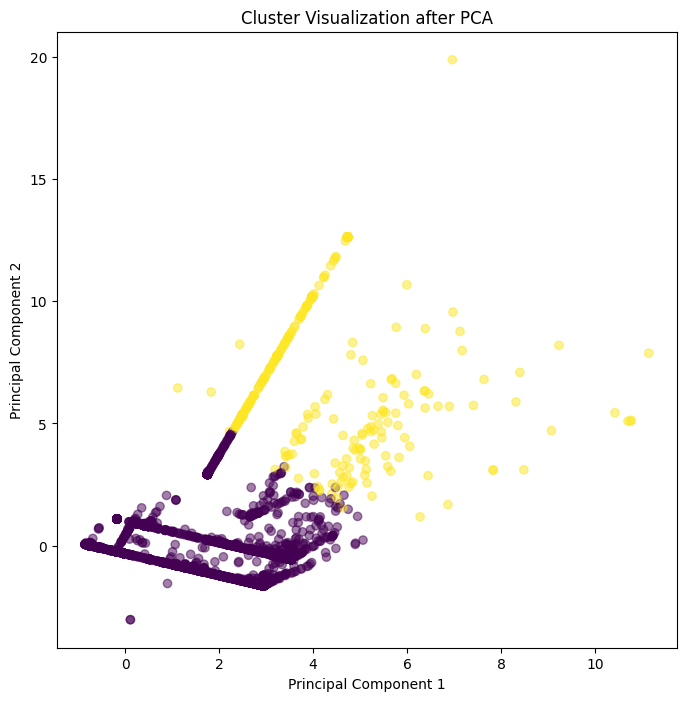

In [16]:
# Extracting the features for clustering
features = web_df[['protocol', 'length', 'payload_size', 'interarrival_time', 'dst_interarrival_time']]

# Imputing with the mean
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Assuming two clusters for Spotify Playback packets and Nonplayback pacekts
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features_scaled)

# The cluster labels for each data point
clusters = kmeans.labels_
web_df['cluster'] = clusters

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)

# Plotting the clusters
plt.figure(figsize=(8, 8))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.title('Cluster Visualization after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Back to visualization of inter-arrival time using Cluster as Labels

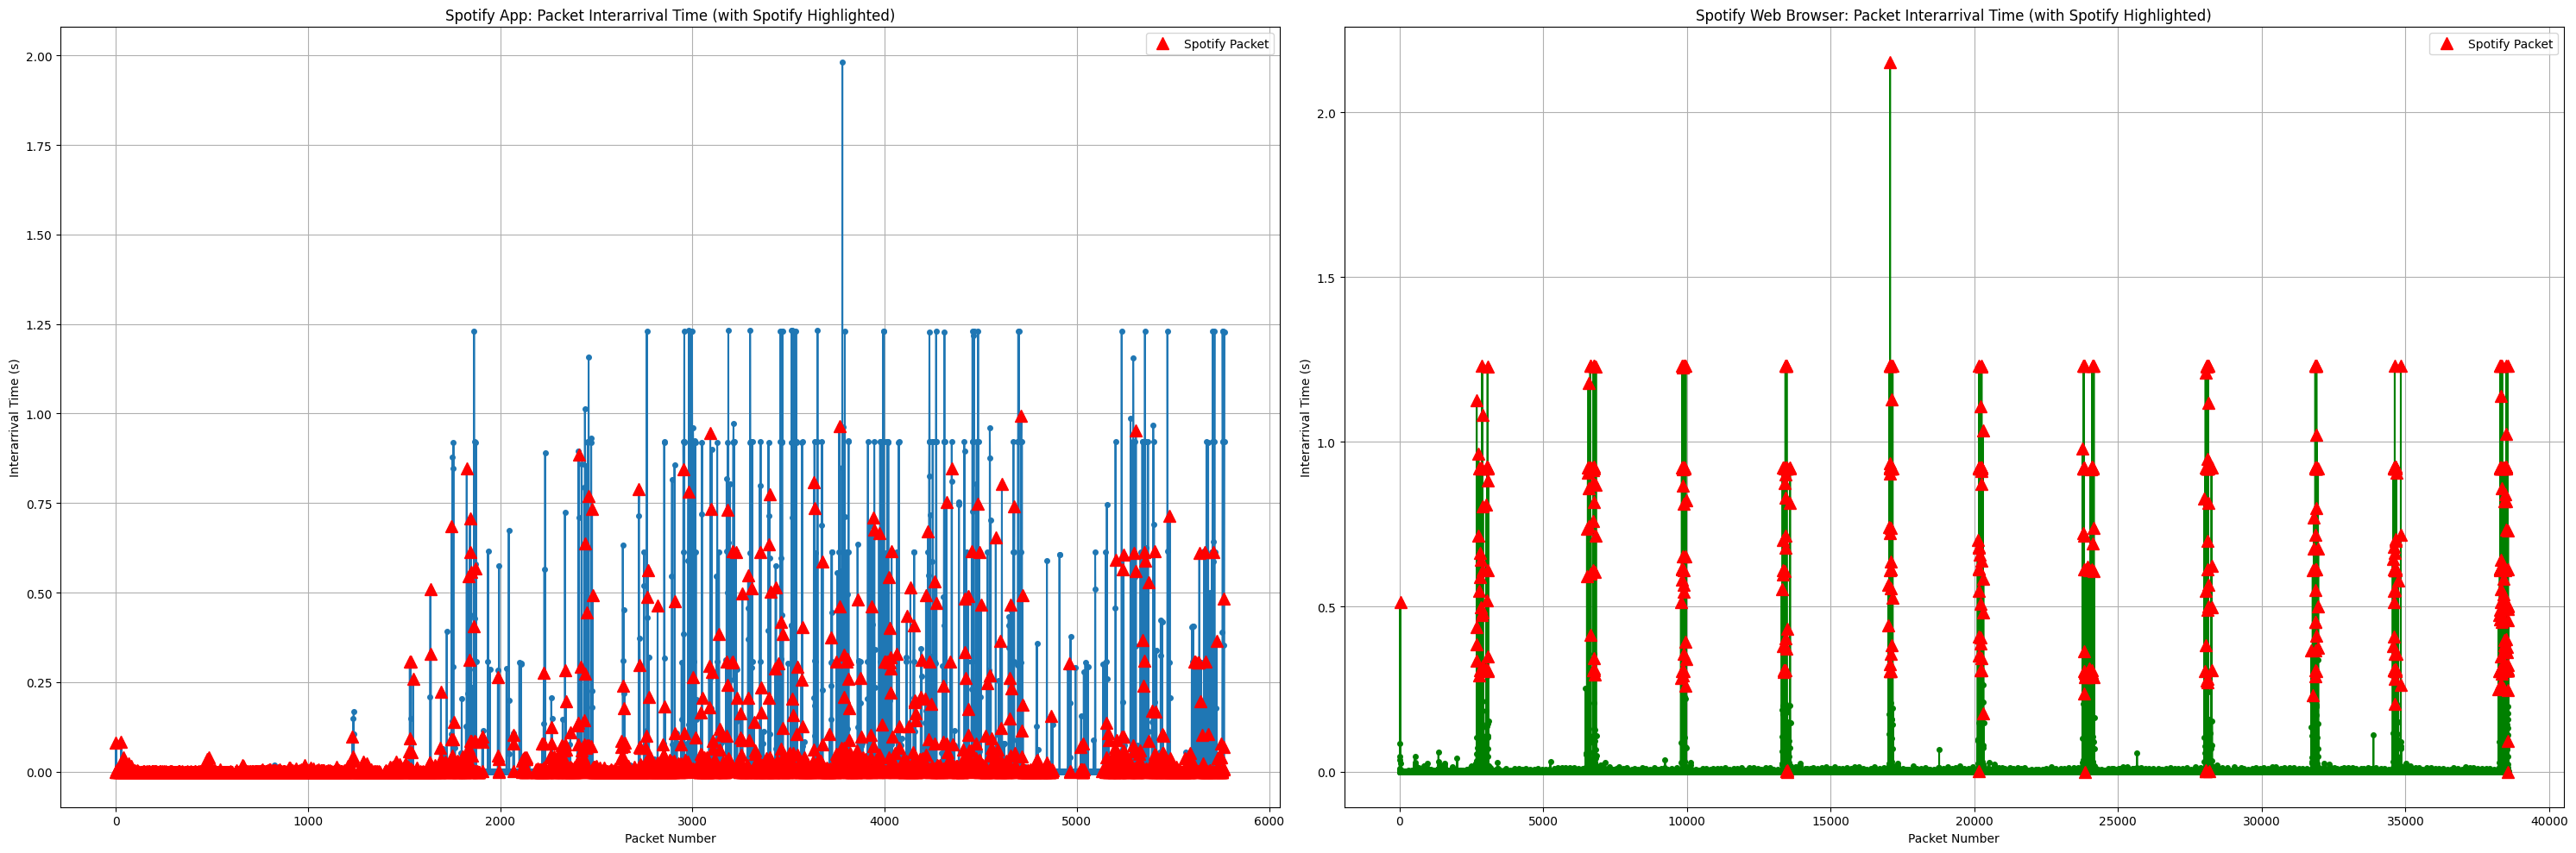

In [17]:
# extract indices of cluster == 1 to label for the plot
spotify_indices_app = app_df[app_df['cluster'] == 1].index
spotify_indices_web = web_df[web_df['cluster'] == 1].index

plt.figure(figsize=(30, 10))

# Line Plots
plt.subplot(1, 2, 1)
plt.plot(app_df['interarrival_time'], marker='o', linestyle='-', markersize=4)
plt.plot(spotify_indices_app, app_df.loc[spotify_indices_app, 'interarrival_time'], 'r^', markersize=10, label='Spotify Packet')
plt.title('Spotify App: Packet Interarrival Time (with Spotify Highlighted)')
plt.xlabel('Packet Number')
plt.ylabel('Interarrival Time (s)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(web_df['interarrival_time'], marker='o', linestyle='-', markersize=4, color='green')
plt.plot(spotify_indices_web, web_df.loc[spotify_indices_web, 'interarrival_time'], 'r^', markersize=10, label='Spotify Packet')
plt.title('Spotify Web Browser: Packet Interarrival Time (with Spotify Highlighted)')
plt.xlabel('Packet Number')
plt.ylabel('Interarrival Time (s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


It is visually evident that K-Means Clustering works well on the Web Browser data. I will now use this as a label for Decision Tree.

Also for App data, I will adjust the number of clusters to see if I can yield different result.

### Adjusting the number of Clusters for App data

In [18]:
# Extracting the features for clustering
features = app_df[['protocol', 'length', 'payload_size', 'interarrival_time', 'dst_interarrival_time']]

# Imputing with the mean
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Assuming two clusters for Spotify Playback packets and Nonplayback pacekts
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features_scaled)

# The cluster labels for each data point
clusters = kmeans.labels_
app_df['cluster'] = clusters
print(app_df['cluster'].value_counts())
print(app_df[app_df['spotify_or_not']==1]['cluster'].value_counts())

cluster
1    3585
0    1394
2     781
3       9
Name: count, dtype: int64
cluster
1    259
0      4
Name: count, dtype: int64


Through manually trying different number of clusters and visualizing the results, n_clusters=4 of cluster 0 represents the Spotify packets relatively well.

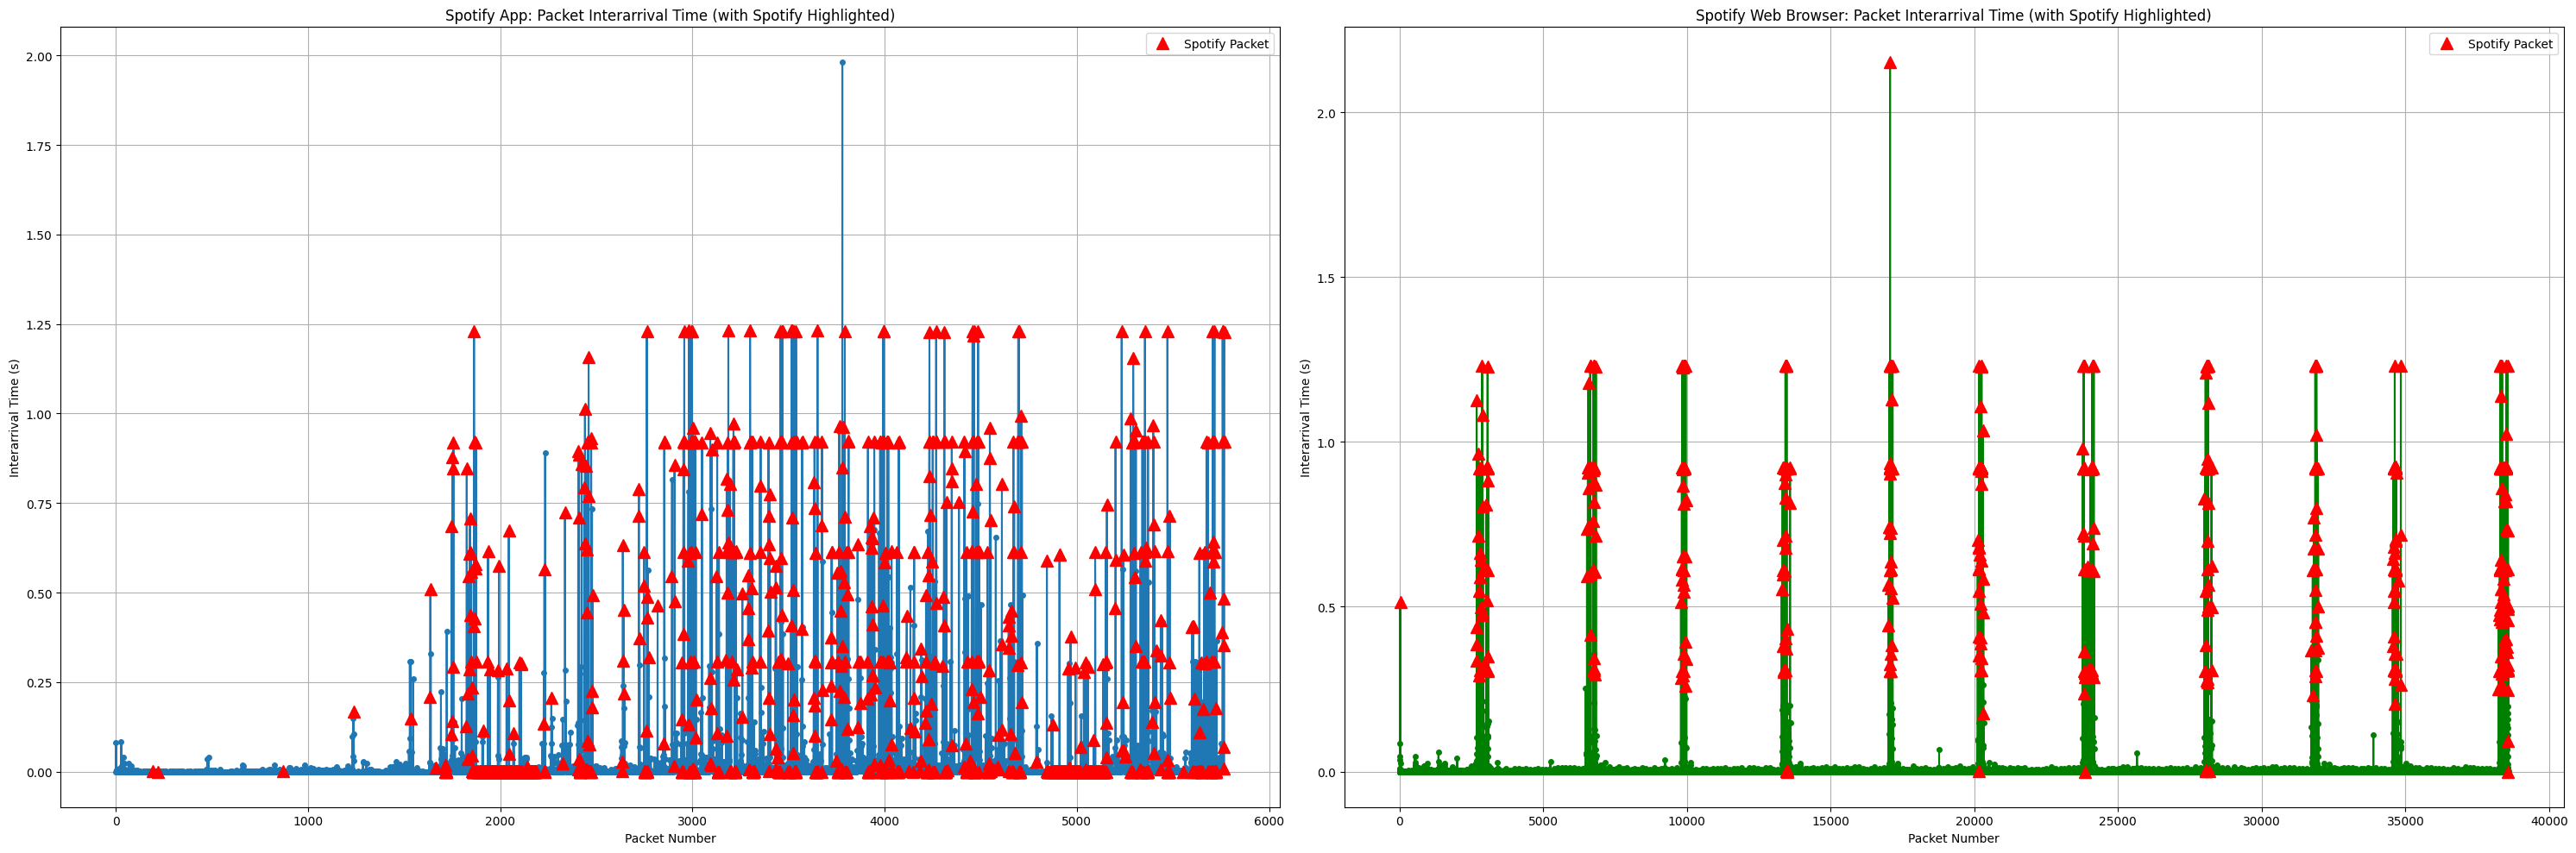

In [19]:
# extract indices of spotify_or_not == 1 to label for the plot
spotify_indices_app = app_df[app_df['cluster'] == 0].index
spotify_indices_web = web_df[web_df['cluster'] == 1].index

plt.figure(figsize=(30, 10))

# Line Plots
plt.subplot(1, 2, 1)
plt.plot(app_df['interarrival_time'], marker='o', linestyle='-', markersize=4)
plt.plot(spotify_indices_app, app_df.loc[spotify_indices_app, 'interarrival_time'], 'r^', markersize=10, label='Spotify Packet')
plt.title('Spotify App: Packet Interarrival Time (with Spotify Highlighted)')
plt.xlabel('Packet Number')
plt.ylabel('Interarrival Time (s)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(web_df['interarrival_time'], marker='o', linestyle='-', markersize=4, color='green')
plt.plot(spotify_indices_web, web_df.loc[spotify_indices_web, 'interarrival_time'], 'r^', markersize=10, label='Spotify Packet')
plt.title('Spotify Web Browser: Packet Interarrival Time (with Spotify Highlighted)')
plt.xlabel('Packet Number')
plt.ylabel('Interarrival Time (s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### DT with Clustering Labels

In [20]:
''' Web Data '''
le = LabelEncoder()
web_df['protocol'] = le.fit_transform(web_df['protocol'])

# Define features and target (now the target is the cluster label)
X_web = web_df[['protocol', 'length', 'payload_size', 'interarrival_time', 'dst_interarrival_time']]
y_web = web_df['cluster']

# Split data
X_train_web, X_test_web, y_train_web, y_test_web = train_test_split(X_web, y_web, test_size=0.3, random_state=42)

# Train decision tree
dt_classifier_web = DecisionTreeClassifier(random_state=42)
dt_classifier_web.fit(X_train_web, y_train_web)

# Make predictions
predictions_web = dt_classifier_web.predict(X_test_web)

# Evaluate the model
print("Decision Tree on Web data")
print("Accuracy:", accuracy_score(y_test_web, predictions_web))
print("RMSE:", sqrt(mean_squared_error(y_test_web, predictions_web)))
print("Classification Report:\n", classification_report(y_test_web, predictions_web))

Decision Tree on Web data
Accuracy: 0.9995679972351823
RMSE: 0.02078467620189679
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11412
           1       0.98      0.99      0.98       162

    accuracy                           1.00     11574
   macro avg       0.99      1.00      0.99     11574
weighted avg       1.00      1.00      1.00     11574



In [21]:
''' App Data '''
le = LabelEncoder()
app_df['protocol'] = le.fit_transform(app_df['protocol'])

# Define features and target
X = app_df[['protocol', 'length', 'payload_size', 'interarrival_time', 'dst_interarrival_time']]
y = app_df['cluster']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train decision tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
predictions = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree on Web data")
print("Accuracy:", accuracy_score(y_test_web, predictions_web))
print("RMSE:", sqrt(mean_squared_error(y_test_web, predictions_web)))
print("Classification Report:\n", classification_report(y_test_web, predictions_web))

Decision Tree on Web data
Accuracy: 0.9995679972351823
RMSE: 0.02078467620189679
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11412
           1       0.98      0.99      0.98       162

    accuracy                           1.00     11574
   macro avg       0.99      1.00      0.99     11574
weighted avg       1.00      1.00      1.00     11574



## Distinguish `start_playback` and `stop_playback`

We were able to identify Spotify packets using K-Means Clustering and Decision Tree Classifier. Now we will explore if we can identify the `start_playback` and `stop_playback`.

We first take a look at the clustering data again.

In [22]:
# app_df.to_csv('../data/labeled_app_df.csv')
app_df.head()

,time,protocol,src_ip,dst_ip,src_port,dst_port,length,payload_size,query_name,spotify_or_not,interarrival_time,dst_interarrival_time,cluster
0,1.712707e+09,3,fe80::82ab:4dff:febf:19e1,fe80::813:7ec4:1375:15d9,NaN,NaN,32.0,NaN,NaN,0,NaN,NaN,0
1,1.712707e+09,3,fe80::813:7ec4:1375:15d9,fe80::82ab:4dff:febf:19e1,NaN,NaN,24.0,NaN,NaN,0,0.000159,NaN,1
2,1.712707e+09,2,2600:1700:1420:3b60:e46c:b485:479d:6b1a,2600:1700:1420:3b60::1,61799.0,53.0,51.0,43.0,gateway.fe2.apple-dns.net.,0,0.080788,NaN,1
3,1.712707e+09,2,2600:1700:1420:3b60:e46c:b485:479d:6b1a,2600:1700:1420:3b60::1,52311.0,53.0,51.0,43.0,gateway.fe2.apple-dns.net.,0,0.000199,0.000199,1
4,1.712707e+09,2,2600:1700:1420:3b60::1,2600:1700:1420:3b60:e46c:b485:479d:6b1a,53.0,52311.0,83.0,75.0,gateway.fe2.apple-dns.net.,0,0.004130,NaN,1


In [23]:
# web_df.to_csv('../data/labeled_web_df.csv')
# web_df.head()
# web_df[web_df['cluster']==1].value_counts()
print(web_df.isnull().sum(axis=0))

print(web_df[web_df['cluster']==1].isnull().sum(axis=0))

time                         0
protocol                     0
src_ip                    1003
dst_ip                    1003
src_port                  1113
dst_port                  1113
length                    1003
payload_size              1113
query_name               38338
spotify_or_not               0
interarrival_time            1
dst_interarrival_time     1051
cluster                      0
dtype: int64
time                       0
protocol                   0
src_ip                   384
dst_ip                   384
src_port                 409
dst_port                 409
length                   384
payload_size             409
query_name               496
spotify_or_not             0
interarrival_time          0
dst_interarrival_time    388
cluster                    0
dtype: int64


In [24]:
for ip in web_df['dst_ip'].unique():
    print(ip)

2600:1901:1:c36::
2600:1700:1420:3b60:e46c:b485:479d:6b1a
2600:1406:5e00:4c::17ce:e550
nan
2600:1700:1420:3b60::1
2620:149:a43:113::4
2600:1406:4e00:7::17dc:4bea
2a04:4e42:87::760
2600:1901:1:3b2::
2607:f8b0:4008:814::200e
2a04:4e42:87::763
142.250.138.138
192.168.1.81
34.120.195.249
2607:f8b0:4023:1009::5e
2600:1901:1:e71::
2a04:4e42:87::762
2606:4700::6813:b234
2606:4700:4400::6812:2089
146.75.92.157
2600:1406:3400:3a8::1931
151.101.64.84
fe80::82ab:4dff:febf:19e1
fe80::813:7ec4:1375:15d9
34.117.41.85
35.155.246.37
2600:1406:4e00:7::17dc:4be4
2620:149:a43:180::2:4
fe80::181a:22f2:afe6:9b57
224.0.0.1
17.57.144.27
68.181.8.108
2600:1406:4e00:7::17dc:4bf7
255.255.255.255
ff02::fb
224.0.0.251
192.168.1.255
44.228.151.38
2600:1406:5400:4b1::1aca
ff02::1:ff00:29
2607:f8b0:4023:1002::88
ff02::1
ff02::1:ff9d:6b1a
ff02::1:ff79:9243
ff02::1:ff75:15d9
44.235.78.64
18.65.3.43
2620:149:a43:180::2:5
192.168.1.64


In [25]:
web_df['src_ip'].value_counts()

src_ip
2600:1406:4e00:7::17dc:4bf7                29788
2600:1700:1420:3b60:e46c:b485:479d:6b1a     3975
2600:1901:1:3b2::                            676
2600:1901:1:e71::                            424
2620:149:a43:113::4                          424
2a04:4e42:87::762                            277
2600:1901:1:c36::                            262
2600:1406:4e00:7::17dc:4bea                  251
2a04:4e42:87::760                            187
192.168.1.81                                 183
2607:f8b0:4023:1009::5e                      182
2606:4700::6813:b234                         162
2620:149:a43:180::2:4                        108
2600:1700:1420:3b60::1                       107
2600:1406:5e00:4c::17ce:e550                  54
2607:f8b0:4008:814::200e                      52
fe80::813:7ec4:1375:15d9                      51
18.65.3.43                                    51
2a04:4e42:87::763                             47
34.117.41.85                                  42
2600:1406:340

In [26]:
web_df['dst_ip'].value_counts()

dst_ip
2600:1700:1420:3b60:e46c:b485:479d:6b1a    33090
2600:1406:4e00:7::17dc:4bf7                 2141
2600:1901:1:e71::                            537
2620:149:a43:113::4                          337
2600:1901:1:c36::                            236
192.168.1.81                                 182
2600:1901:1:3b2::                            135
2a04:4e42:87::760                            135
2600:1700:1420:3b60::1                       114
2620:149:a43:180::2:4                         78
18.65.3.43                                    49
2a04:4e42:87::762                             42
34.117.41.85                                  40
2600:1406:4e00:7::17dc:4bea                   38
fe80::813:7ec4:1375:15d9                      37
2607:f8b0:4008:814::200e                      35
fe80::82ab:4dff:febf:19e1                     29
2606:4700::6813:b234                          27
2600:1406:5e00:4c::17ce:e550                  26
ff02::fb                                      25
2a04:4e42:87:

In [27]:
'''
### Manual Inspection looking up IP on Web Browser Development Tool ###

146.75.92.157 (Sweden)
35.155.246.37 
34.117.41.85
2a04:4e42:87::760 Netherlands
2a04:4e42:87::762  Netherlands (fastly)

23.220.75.247:443 audio
2600:1406:4e00:7::17dc:4bf7 audio
'''

'\n### Manual Inspection looking up IP on Web Browser Development Tool ###\n\n146.75.92.157 (Sweden)\n35.155.246.37 \n34.117.41.85\n2a04:4e42:87::760 Netherlands\n2a04:4e42:87::762  Netherlands (fastly)\n\n23.220.75.247:443 audio\n2600:1406:4e00:7::17dc:4bf7 audio\n'

# Label the data by manual inspection

In [76]:
import numpy as np

In [77]:
# read data again to clear the data imputation with mean
app_df = pd.read_csv('../data/spotify_app_control_sorted.csv', index_col=0)
web_df = pd.read_csv('../data/spotify_web_control_sorted.csv', index_col=0)

# manually inspected Spotify IP addresses
spotify_ip_lst = [
    '146.75.92.157',
    '35.155.246.37 ',
    '34.117.41.85',
    '2a04:4e42:87::760',
    '2a04:4e42:87::762',
    '23.220.75.247:443', # audio
    '2600:1406:4e00:7::17dc:4bf7' # audio
]

In [78]:
web_df['manual_spotify_or_not'] = np.where(
    (web_df['src_ip']==spotify_ip_lst[0]) | (web_df['src_ip']==spotify_ip_lst[1]) | 
    (web_df['src_ip']==spotify_ip_lst[2]) | (web_df['src_ip']==spotify_ip_lst[3]) |
    (web_df['src_ip']==spotify_ip_lst[4]) | (web_df['src_ip']==spotify_ip_lst[5]) |
    (web_df['src_ip']==spotify_ip_lst[6]),
      1, 0)
# web_df

In [79]:
# web_df['audio_or_not'] = np.where(
#     (web_df['dst_ip']==spotify_ip_lst[5]) | (web_df['dst_ip']==spotify_ip_lst[6]) |
#     (web_df['src_ip']==spotify_ip_lst[5]) | (web_df['src_ip']==spotify_ip_lst[6]) ,
#       1, 0)
web_df['audio_or_not'] = np.where(
    (web_df['src_ip']==spotify_ip_lst[5]) | (web_df['src_ip']==spotify_ip_lst[6]) & (web_df['payload_size']!=0),
      1, 0)

In [80]:
web_df['manual_spotify_or_not'].value_counts()

manual_spotify_or_not
1    30320
0     8260
Name: count, dtype: int64

We were able to distinguish Spotify's audio streaming packets from Manual Insepction based on packets information, which included the range of bytes and using same IP address and the domain url. (and also these packets were exchanged consecutively around 10 of them)

In [81]:
web_df['audio_or_not'].value_counts()

audio_or_not
1    29775
0     8805
Name: count, dtype: int64

In [82]:
# web_df.to_csv('../data/spotify_web_control_sorted_new_label.csv')

### DT with Manual Inspection Labels

Spotify Desktop Application uses multi-cast DNS resolution using Akami, and it is difficult to identify IP address of Spotify. Therefore, we only use Spotify Web Browser data for this process.

In [83]:
''' Web Data '''
le = LabelEncoder()
web_df['protocol'] = le.fit_transform(web_df['protocol'])

# Define features and target (now the target is the cluster label)
X_web = web_df[['protocol', 'length', 'payload_size', 'interarrival_time', 'dst_interarrival_time']]
y_web = web_df['manual_spotify_or_not']

# Split data
X_train_web, X_test_web, y_train_web, y_test_web = train_test_split(X_web, y_web, test_size=0.3, random_state=42)

# Train decision tree
dt_classifier_web = DecisionTreeClassifier(random_state=42)
dt_classifier_web.fit(X_train_web, y_train_web)

# Make predictions
predictions_web = dt_classifier_web.predict(X_test_web)

# Evaluate the model
print("Decision Tree on Web data (spotify_or_not)")
print("Accuracy:", accuracy_score(y_test_web, predictions_web))
print("RMSE:", sqrt(mean_squared_error(y_test_web, predictions_web)))
print("Classification Report:\n", classification_report(y_test_web, predictions_web))

Decision Tree on Web data (spotify_or_not)
Accuracy: 0.9830654916191464
RMSE: 0.13013265685773742
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      2474
           1       0.98      0.99      0.99      9100

    accuracy                           0.98     11574
   macro avg       0.98      0.97      0.97     11574
weighted avg       0.98      0.98      0.98     11574



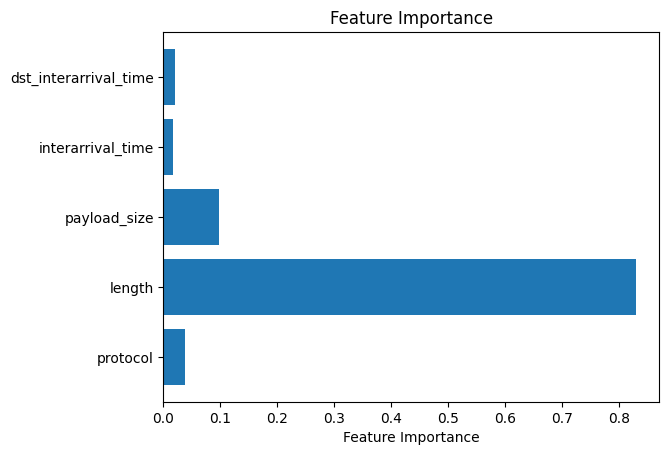

In [84]:
# Get feature importance
feature_importance = dt_classifier_web.feature_importances_

# Plot feature importance
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), X_web)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

We still observe the relatively high classification rate, and both precision and recall over 0.9.

Now, let's see if we can identify the audio packets specifically.

In [85]:
''' Web Data '''
le = LabelEncoder()
web_df['protocol'] = le.fit_transform(web_df['protocol'])

# Define features and target (now the target is the cluster label)
X_web = web_df[['protocol', 'length', 'payload_size', 'interarrival_time', 'dst_interarrival_time']]
y_web = web_df['audio_or_not']

# Split data
X_train_web, X_test_web, y_train_web, y_test_web = train_test_split(X_web, y_web, test_size=0.3, random_state=42)

# Train decision tree
dt_classifier_web = DecisionTreeClassifier(random_state=42)
dt_classifier_web.fit(X_train_web, y_train_web)

# Make predictions
predictions_web = dt_classifier_web.predict(X_test_web)

# Evaluate the model
print("Decision Tree on Web data (audio_or_not)")
print("Accuracy:", accuracy_score(y_test_web, predictions_web))
print("RMSE:", sqrt(mean_squared_error(y_test_web, predictions_web)))
print("Classification Report:\n", classification_report(y_test_web, predictions_web))

Decision Tree on Web data (audio_or_not)
Accuracy: 0.9891135303265941
RMSE: 0.10433824645548682
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      2641
           1       0.99      1.00      0.99      8933

    accuracy                           0.99     11574
   macro avg       0.99      0.98      0.98     11574
weighted avg       0.99      0.99      0.99     11574



The DT classifier predicts Audio data with higher accuracy and precision but with lower recall. (However, RMSE is lower.)

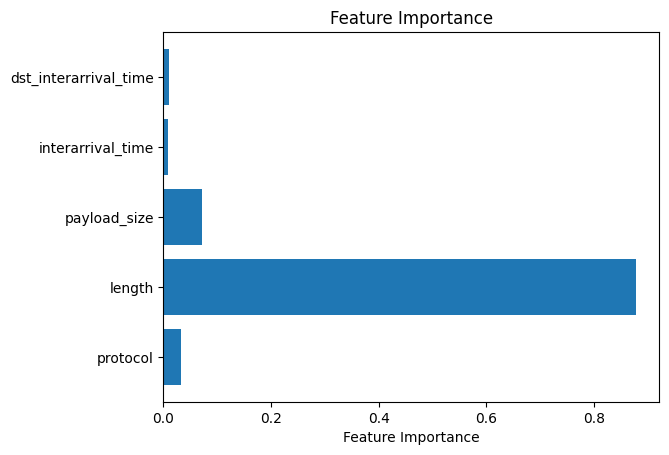

In [86]:
# Get feature importance
feature_importance = dt_classifier_web.feature_importances_

# Plot feature importance
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), X_web)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

### Improve Classification Rate (RMSE, Precision and Recall)

Now, let's try different models to improve the classification rate.

We will try both Random Forest and XGboost. We will only consider models that can perform with NaN values, as other data is relatively small.

#### Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

''' Web Data '''
# Define features and target (now the target is the cluster label)
X_web = web_df[['protocol', 'length', 'payload_size', 'interarrival_time', 'dst_interarrival_time']]
y_web = web_df['manual_spotify_or_not']

# Split data
X_train_web, X_test_web, y_train_web, y_test_web = train_test_split(X_web, y_web, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_classifier_web = RandomForestClassifier(random_state=42)
rf_classifier_web.fit(X_train_web, y_train_web)

# Make predictions
predictions_web = rf_classifier_web.predict(X_test_web)

# Evaluate the model
print("Random Forest on Web data (spotify_or_not)")
print("Accuracy:", accuracy_score(y_test_web, predictions_web))
print("RMSE:", sqrt(mean_squared_error(y_test_web, predictions_web)))
print("Classification Report:\n", classification_report(y_test_web, predictions_web))

Random Forest on Web data (spotify_or_not)
Accuracy: 0.9848799032313806
RMSE: 0.12296380267631332
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      2474
           1       0.99      0.99      0.99      9100

    accuracy                           0.98     11574
   macro avg       0.98      0.97      0.98     11574
weighted avg       0.98      0.98      0.98     11574



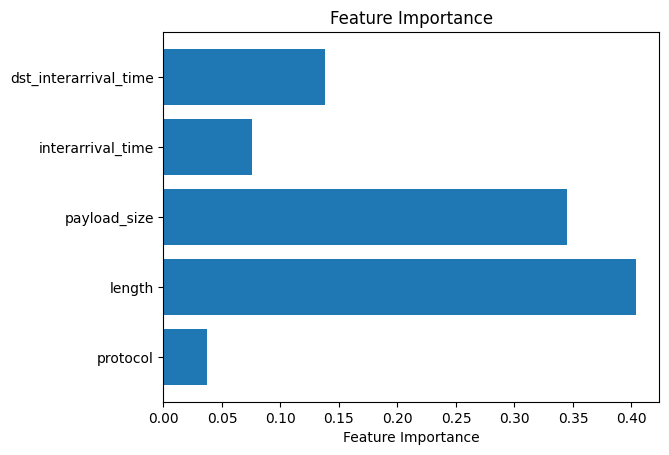

In [88]:
# Get feature importance
feature_importance = rf_classifier_web.feature_importances_

# Plot feature importance
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), X_web)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

In [89]:
''' Web Data '''
# Define features and target (now the target is the cluster label)
X_web = web_df[['protocol', 'length', 'payload_size', 'interarrival_time', 'dst_interarrival_time']]
y_web = web_df['audio_or_not']

# Split data
X_train_web, X_test_web, y_train_web, y_test_web = train_test_split(X_web, y_web, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_classifier_web = RandomForestClassifier(random_state=42)
rf_classifier_web.fit(X_train_web, y_train_web)

# Make predictions
predictions_web = rf_classifier_web.predict(X_test_web)

# Evaluate the model
print("Random Forest on Web data (audio_or_not)")
print("Accuracy:", accuracy_score(y_test_web, predictions_web))
print("RMSE:", sqrt(mean_squared_error(y_test_web, predictions_web)))
print("Classification Report:\n", classification_report(y_test_web, predictions_web))

Random Forest on Web data (audio_or_not)
Accuracy: 0.9891135303265941
RMSE: 0.10433824645548682
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      2641
           1       0.99      1.00      0.99      8933

    accuracy                           0.99     11574
   macro avg       0.99      0.98      0.98     11574
weighted avg       0.99      0.99      0.99     11574



Random Forest has higher accuracy rate, lower RMSE, higher precision and recall for both classification tasks.

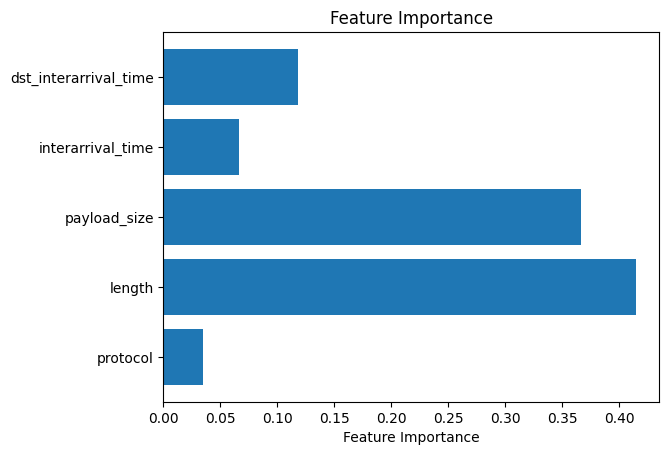

In [90]:
# Get feature importance
feature_importance = rf_classifier_web.feature_importances_

# Plot feature importance
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), X_web)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

#### XGBoost

In [91]:
from xgboost import XGBClassifier

In [92]:
''' Web Data '''
# Define features and target (now the target is the cluster label)
X_web = web_df[['protocol', 'length', 'payload_size', 'interarrival_time', 'dst_interarrival_time']]
y_web = web_df['manual_spotify_or_not']
# Split data
X_train_web, X_test_web, y_train_web, y_test_web = train_test_split(X_web, y_web, test_size=0.3, random_state=42)

# Train Random Forest Classifier
xgb_classifier_web = XGBClassifier(random_state=42)
xgb_classifier_web.fit(X_train_web, y_train_web)

# Make predictions
predictions_web = xgb_classifier_web.predict(X_test_web)

# Evaluate the model
print("XGBoost on Web data (spotify_or_not)")
print("Accuracy:", accuracy_score(y_test_web, predictions_web))
print("RMSE:", sqrt(mean_squared_error(y_test_web, predictions_web)))
print("Classification Report:\n", classification_report(y_test_web, predictions_web))

XGBoost on Web data (spotify_or_not)
Accuracy: 0.9834110938310006
RMSE: 0.12879792765801584
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      2474
           1       0.98      0.99      0.99      9100

    accuracy                           0.98     11574
   macro avg       0.98      0.97      0.98     11574
weighted avg       0.98      0.98      0.98     11574



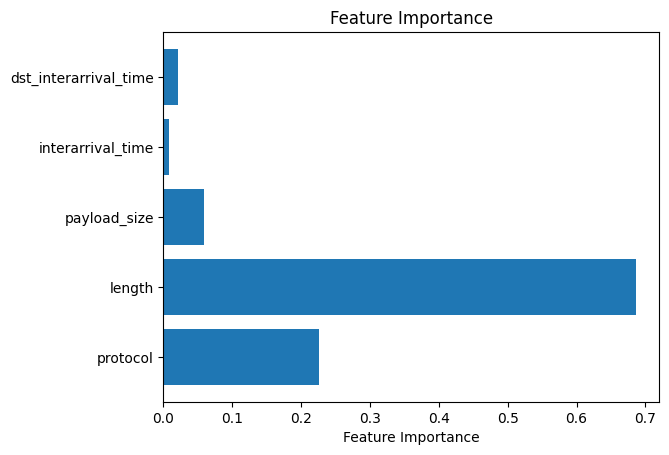

In [93]:
# Get feature importance
feature_importance = xgb_classifier_web.feature_importances_

# Plot feature importance
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), X_web)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

In [94]:
''' Web Data '''
le = LabelEncoder()
web_df['protocol'] = le.fit_transform(web_df['protocol'])
# Define features and target (now the target is the cluster label)
X_web = web_df[['protocol', 'length', 'payload_size', 'interarrival_time', 'dst_interarrival_time']]
y_web = web_df['audio_or_not']
# Split data
X_train_web, X_test_web, y_train_web, y_test_web = train_test_split(X_web, y_web, test_size=0.3, random_state=42)

# Train Random Forest Classifier
xgb_classifier_web = XGBClassifier(random_state=42)
xgb_classifier_web.fit(X_train_web, y_train_web)

# Make predictions
predictions_web = xgb_classifier_web.predict(X_test_web)

# Evaluate the model
print("XGBoost on Web data (audio_or_not)")
print("Accuracy:", accuracy_score(y_test_web, predictions_web))
print("RMSE:", sqrt(mean_squared_error(y_test_web, predictions_web)))
print("Classification Report:\n", classification_report(y_test_web, predictions_web))

XGBoost on Web data (audio_or_not)
Accuracy: 0.9860031104199067
RMSE: 0.11830845100876484
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      2641
           1       0.99      1.00      0.99      8933

    accuracy                           0.99     11574
   macro avg       0.99      0.97      0.98     11574
weighted avg       0.99      0.99      0.99     11574



Compared to RF, XGBoost has a slightly higher accuracy rate, lower RMSE and but same preicision and recall.

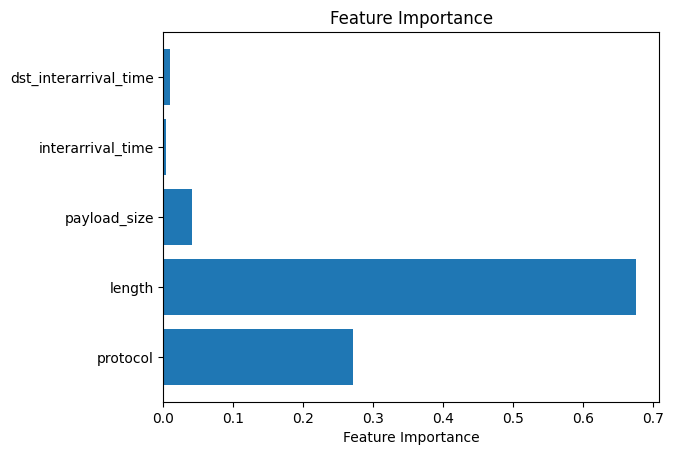

In [95]:
# Get feature importance
feature_importance = xgb_classifier_web.feature_importances_

# Plot feature importance
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), X_web)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV

# Define features and target (now the target is the cluster label)
X_web = web_df[['protocol', 'length', 'payload_size', 'interarrival_time', 'dst_interarrival_time']]
y_web = web_df['manual_spotify_or_not']
# Split data
X_train_web, X_test_web, y_train_web, y_test_web = train_test_split(X_web, y_web, test_size=0.3, random_state=42)

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42, objective='reg:squarederror'), param_grid=param_grid, scoring='f1', cv=3, verbose=1)
grid_search.fit(X_train_web, y_train_web)

best_parameters = grid_search.best_params_
print("Best parameters:", best_parameters)
best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test_web)

# Evaluate the best model
print("XGBoost on Web data (spotify_or_not)")
print("Accuracy:", accuracy_score(y_test_web, best_pred))
print("RMSE:", sqrt(mean_squared_error(y_test_web, best_pred)))
print("Classification Report:\n", classification_report(y_test_web, best_pred))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}
XGBoost on Web data (spotify_or_not)
Accuracy: 0.9917919474684638
RMSE: 0.0905983031382829
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10849
           1       0.93      0.94      0.93       725

    accuracy                           0.99     11574
   macro avg       0.96      0.97      0.97     11574
weighted avg       0.99      0.99      0.99     11574



Simple GridSearch increased the RMSE, but lowered the f1-score.